In [1]:
""" 
Formação Cientista de Dados - Prof. Fernando Amaral
SEÇÃO 10: Limpeza e Tratamento de Dados

Tratar dados 'tempo.csv'
   Aparência: sol, nublado, chuva
   Temperatura: -130 ~ 130 F
   Umidade: 0 ~ 100
   Vento: Verdadeiro/Falso
   Jogar: sim/nao
   
**Tratar valores NA

"""

import pandas as pd
import seaborn as srn
import statistics  as sts

In [69]:
#importar dados
dados = pd.read_csv("tempo.csv", sep=";")
#visulizar
dados.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [5]:
aparencia = dados.groupby(['Aparencia']).size()
aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

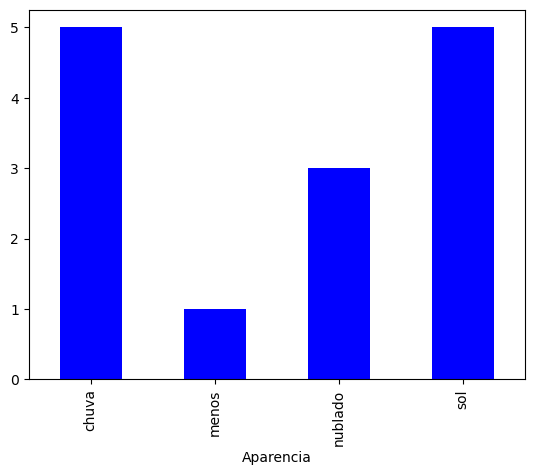

In [6]:
aparencia.plot.bar(color = 'blue')

In [12]:
temperatura = dados.groupby(['Temperatura']).size()
temperatura

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

<AxesSubplot:xlabel='Temperatura'>

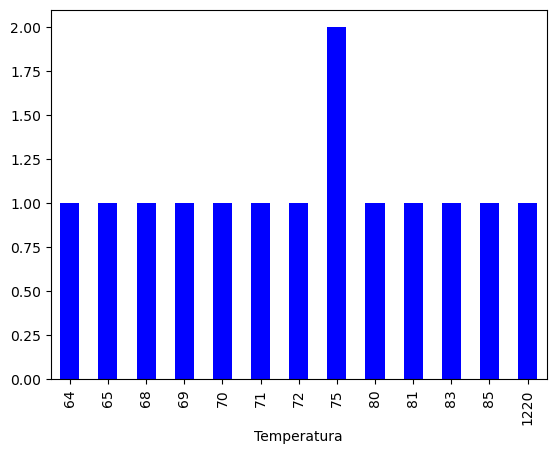

In [13]:
temperatura.plot.bar(color = 'blue')

In [14]:
umidade = dados.groupby(['Umidade']).size()
umidade

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

<AxesSubplot:xlabel='Umidade'>

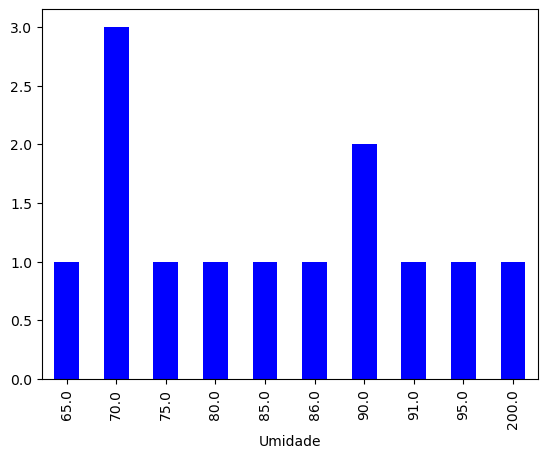

In [15]:
umidade.plot.bar(color = 'blue')

In [71]:
vento = dados.groupby(['Vento']).size()
vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<AxesSubplot:xlabel='Vento'>

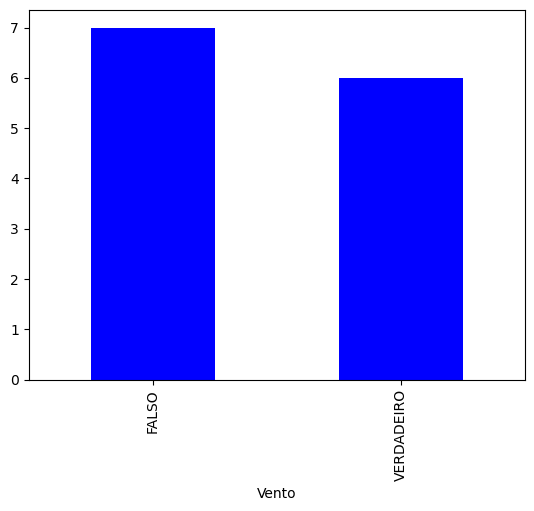

In [8]:
vento.plot.bar(color = 'blue')

In [9]:
jogar = dados.groupby(['Jogar']).size()
jogar

Jogar
nao    5
sim    9
dtype: int64

<AxesSubplot:xlabel='Jogar'>

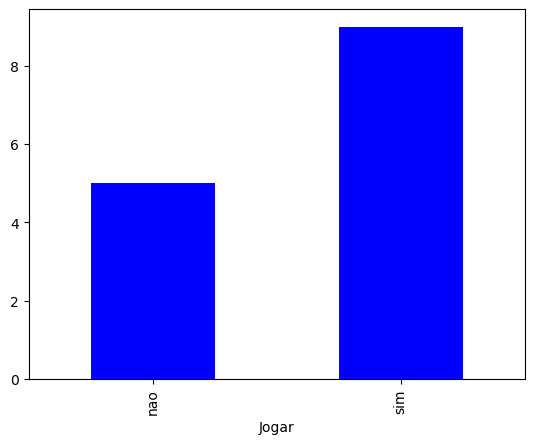

In [10]:
jogar.plot.bar(color = 'blue')

In [19]:
#Explorando as colunas numéricas

dados['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

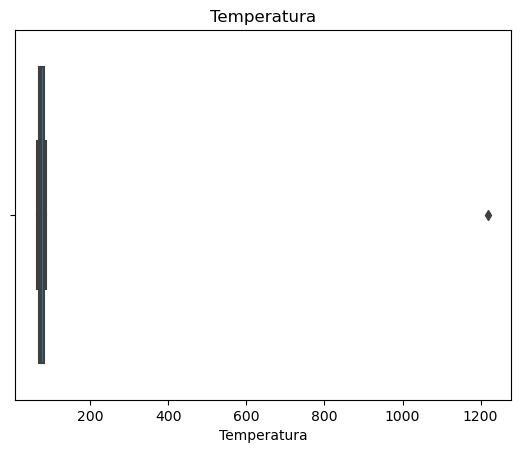

In [21]:
srn.boxplot(x=dados['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

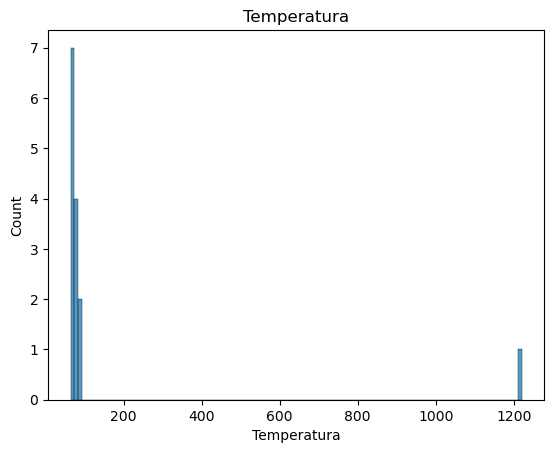

In [25]:
srn.histplot(dados['Temperatura']).set_title('Temperatura')

In [18]:
dados['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

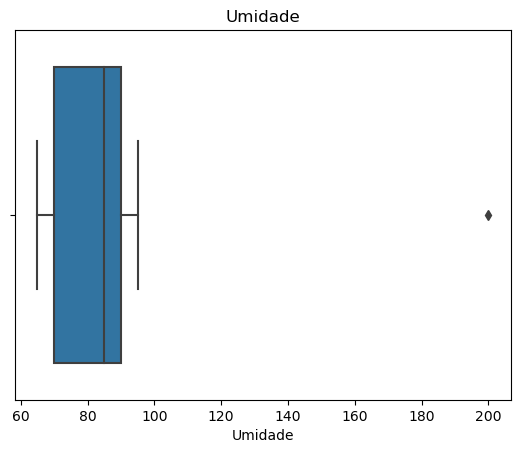

In [22]:
srn.boxplot(x=dados['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Umidade')

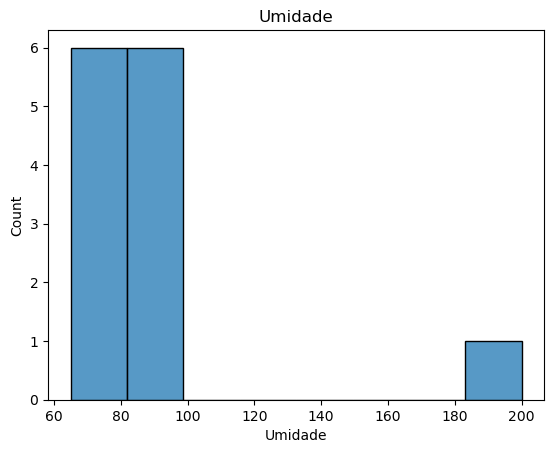

In [26]:
srn.histplot(dados['Umidade']).set_title('Umidade')

In [28]:
#Identificando valores NA
dados.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [37]:
#Identificando e removendo valores fora do padrão da coluna Aparencia

aparencia = dados.groupby(['Aparencia']).size()
print(aparencia)

#Substitui pela moda
dados.loc[dados['Aparencia'] ==  'menos', 'Aparencia'] = "sol"

#Verifica resultado
aparencia = dados.groupby(['Aparencia']).size()
aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64


Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [62]:
#Identificando e removendo valores fora do padrão da coluna Temperatura

print(dados.loc[(dados['Temperatura'] <  -130 )  | ( dados['Temperatura'] >  130) ])

#Busca a mediana
mediana = sts.median(dados['Temperatura'])
mediana

#Substitui pela mediana
dados.loc[(dados['Temperatura'] <  -130 )  | ( dados['Temperatura'] >  130) ] = mediana

#Verifica resultado obs: poderia usar temperatura = dados.groupby(['Temperatura']).size()
dados.loc[(dados['Temperatura'] <  -130 )  | ( dados['Temperatura'] >  130) ]


  Aparencia  Temperatura  Umidade  Vento Jogar
7       sol         1220     95.0  FALSO   nao


,Aparencia,Temperatura,Umidade,Vento,Jogar


In [65]:
#Identificando e removendo valores NA e fora do padrão da coluna Umidade

#Quantidade de valores NA
dados['Umidade'].isnull().sum()

#Busca a mediana
mediana = sts.median(dados['Umidade'])
mediana

#Substituir valores Na pela mediana
dados['Umidade'].fillna(mediana, inplace=True)

#Valores fora do padrão
print(dados.loc[(dados['Umidade'] < 0 )  | ( dados['Umidade'] >  100) ])

#Substituir valores fora do padrão pela mediana
dados.loc[(dados['Umidade'] < 0 )  | ( dados['Umidade'] >  100) ] = mediana

#Verifica resultado obs: poderia usar umidade = dados.groupby(['Umidade']).size()
dados.loc[(dados['Umidade'] <  0 )  | ( dados['Umidade'] >  100) ]


0
Empty DataFrame
Columns: [Aparencia, Temperatura, Umidade, Vento, Jogar]
Index: []


,Aparencia,Temperatura,Umidade,Vento,Jogar


In [73]:
#Identificando e removendo valores NA da coluna Vento

dados['Vento'].isnull().sum()

#Identificando a moda
vento = dados.groupby(['Vento']).size()
print(vento)

#Substitui pela moda
dados['Vento'].fillna('FALSO', inplace=True)

#Verifica resultado
dados['Vento'].isnull().sum()

Vento
FALSO         7
VERDADEIRO    6
dtype: int64


0